Revised T-S plots for 2015

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from salishsea_tools import (nc_tools, geo_tools, tidetools) 
import netCDF4 as nc

In [2]:
Jan = sorted(glob.glob('/results/SalishSea/hindcast/*jan15/*1h*grid_T*'))
Feb = sorted(glob.glob('/results/SalishSea/hindcast/*feb15/*1h*grid_T*'))
Mar = sorted(glob.glob('/results/SalishSea/hindcast/*mar15/*1h*grid_T*'))
Apr = sorted(glob.glob('/results/SalishSea/hindcast/*apr15/*1h*grid_T*'))
May = sorted(glob.glob('/results/SalishSea/hindcast/*may15/*1h*grid_T*'))
Jun = sorted(glob.glob('/results/SalishSea/hindcast/*jun15/*1h*grid_T*'))
Jul = sorted(glob.glob('/results/SalishSea/hindcast/*jul15/*1h*grid_T*'))
Aug = sorted(glob.glob('/results/SalishSea/hindcast/*aug15/*1h*grid_T*'))
Sep1 = sorted(glob.glob('/results/SalishSea/hindcast/*sep15/*1h*grid_T*'))
Sep2 = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*sep15/*1h*grid_T*'))[5:]
Sep = Sep1 + Sep2
Oct = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*oct15/*1h*grid_T*'))
Nov = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*nov15/*1h*grid_T*'))
Dec = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*dec15/*1h*grid_T*'))

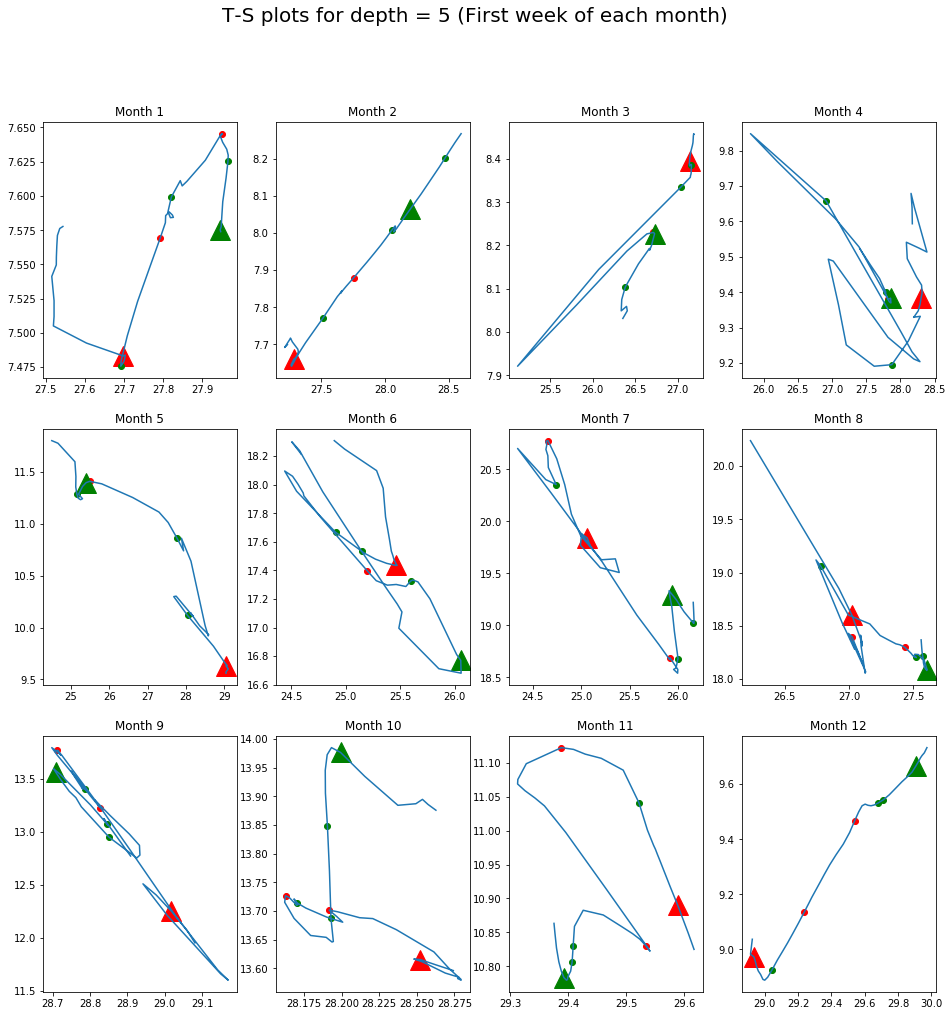

In [58]:
fig,axarr = plt.subplots(3,4, figsize = ((16,16)))
l=0
d=5
for month in [Jan, Feb, Mar, Apr,May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]:
    with nc_tools.scDataset(month) as f:
        s = f.variables['vosaline'][:48,:7,558,155]
        t = f.variables['votemper'][:48,:7,558,155]
        ssh = f.variables['sossheig'][:48,558,155]
    starttimes = np.arange(0,ssh.shape[0]-1,12)
    endtimes = starttimes+12
    k = 0
    lows = []
    highs = []
    for n,m in zip(starttimes,endtimes):
        low = np.argmin(ssh[n:m])
        high = np.argmax(ssh[n:m])
        lows.append(low + 12*k)
        highs.append(high + 12*k)
        k = k+1
    first = True
    for m in highs:
        if first == True:
            axarr[l // 4, l % 4].plot(s[m,d], t[m,d], 'r^',markersize=20)
            first = False
        else: 
            axarr[l // 4, l % 4].plot(s[m,d], t[m,d], 'ro')
    first = True
    for n in lows:
        if first == True:
            axarr[l // 4, l % 4].plot(s[m,d], t[m,d], 'g^', markersize=20)
            first = False
        else:
            axarr[l // 4, l % 4].plot(s[n,d], t[n,d], 'go')
    axarr[l // 4, l % 4].plot(s[:,d], t[:,d]);
    axarr[l // 4, l % 4].set_title("Month " + str(l+1))
    l = l+1
fig.suptitle('T-S plots for depth = 5 (First week of each month)', fontsize = 20)

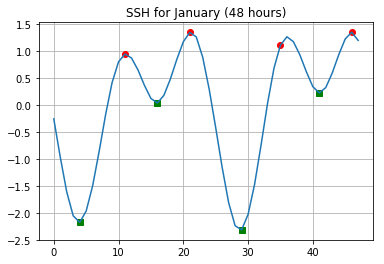

In [104]:
with nc_tools.scDataset(Jan) as f:
        ssh = f.variables['sossheig'][:48,558,155]
        starttimes = np.arange(0,ssh.shape[0]-1,12)
        endtimes = starttimes+12
        k = 0
        lows=[]
        highs=[]
        for n,m in zip(starttimes,endtimes):
            low = np.argmin(ssh[n:m])
            high = np.argmax(ssh[n:m])
            lows.append(low + 12*k)
            highs.append(high + 12*k)
            k = k+1
        for m in highs:
            plt.plot(m, ssh[m], 'ro')
        for n in lows:
            plt.plot(n, ssh[n], 'gs')
x = range(48)
plt.plot(x,ssh)
plt.grid('on')
plt.title('SSH for January (48 hours)')

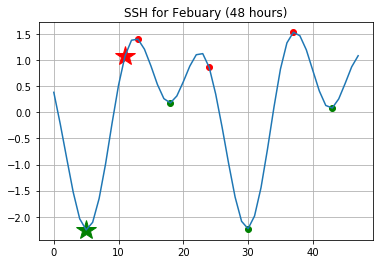

In [80]:
with nc_tools.scDataset(Feb) as f:
        ssh = f.variables['sossheig'][:48,558,155]
        starttimes = np.arange(0,ssh.shape[0]-1,12)
        endtimes = starttimes+12
        k = 0
        lows=[]
        highs=[]
        for n,m in zip(starttimes,endtimes):
            low = np.argmin(ssh[n:m])
            high = np.argmax(ssh[n:m])
            lows.append(low + 12*k)
            highs.append(high + 12*k)
            k = k+1
        first = True
        for m in highs:
            if first == True:
                plt.plot(m, ssh[m], 'r*', markersize=20)
                first = False
            else:
                plt.plot(m,ssh[m],'ro')
        first = True
        for n in lows:
            if first == True:
                plt.plot(n, ssh[n], 'g*', markersize=20)
                first = False
            else:
                plt.plot(n,ssh[n],'go')
x = range(48)
plt.plot(x,ssh)
plt.grid('on')
plt.title('SSH for Febuary (48 hours)')

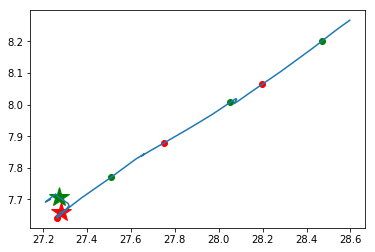

In [87]:
with nc_tools.scDataset(Feb) as f:
        t = f.variables['votemper'][:48,:7,558,155]
        s = f.variables['vosaline'][:48,:7,558,155]
        ssh = f.variables['sossheig'][:48,558,155]
        k = 0
        lows=[]
        highs=[]
        starttimes = np.arange(0,ssh.shape[0]-1,12)
        endtimes = starttimes+12
        for n,m in zip(starttimes,endtimes):
            low = np.argmin(ssh[n:m])
            high = np.argmax(ssh[n:m])
            lows.append(low + 12*k)
            highs.append(high + 12*k)
            k = k+1
        first = True
        for m in highs:
            if first == True:
                plt.plot(s[m,5], t[m,5], 'r*', markersize=20)
                first = False
            else:
                plt.plot(s[m,5],t[m,5],'ro')
        first = True
        for n in lows:
            if first == True:
                plt.plot(s[n,5], t[n,5], 'g*', markersize=20)
                first = False
            else:
                plt.plot(s[n,5],t[n,5],'go')
        plt.plot(s[:,5],t[:,5])

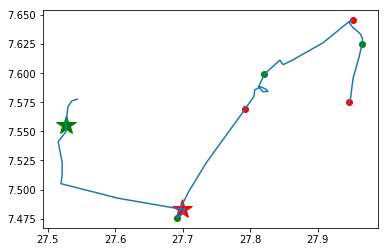

In [88]:
with nc_tools.scDataset(Jan) as f:
        t = f.variables['votemper'][:48,:7,558,155]
        s = f.variables['vosaline'][:48,:7,558,155]
        ssh = f.variables['sossheig'][:48,558,155]
        k = 0
        lows=[]
        highs=[]
        starttimes = np.arange(0,ssh.shape[0]-1,12)
        endtimes = starttimes+12
        for n,m in zip(starttimes,endtimes):
            low = np.argmin(ssh[n:m])
            high = np.argmax(ssh[n:m])
            lows.append(low + 12*k)
            highs.append(high + 12*k)
            k = k+1
        first = True
        for m in highs:
            if first == True:
                plt.plot(s[m,5], t[m,5], 'r*', markersize=20)
                first = False
            else:
                plt.plot(s[m,5],t[m,5],'ro')
        first = True
        for n in lows:
            if first == True:
                plt.plot(s[n,5], t[n,5], 'g*', markersize=20)
                first = False
            else:
                plt.plot(s[n,5],t[n,5],'go')
        plt.plot(s[:,5],t[:,5])

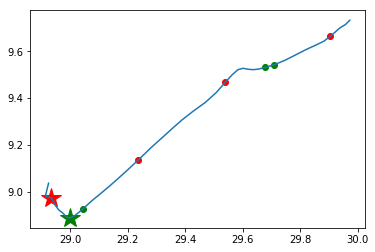

In [95]:
with nc_tools.scDataset(Dec) as f:
        t = f.variables['votemper'][:48,:7,558,155]
        s = f.variables['vosaline'][:48,:7,558,155]
        ssh = f.variables['sossheig'][:48,558,155]
        k = 0
        lows=[]
        highs=[]
        starttimes = np.arange(0,ssh.shape[0]-1,12)
        endtimes = starttimes+12
        for n,m in zip(starttimes,endtimes):
            low = np.argmin(ssh[n:m])
            high = np.argmax(ssh[n:m])
            lows.append(low + 12*k)
            highs.append(high + 12*k)
            k = k+1
        first = True
        for m in highs:
            if first == True:
                plt.plot(s[m,5], t[m,5], 'r*', markersize=20)
                first = False
            else:
                plt.plot(s[m,5],t[m,5],'ro')
        first = True
        for n in lows:
            if first == True:
                plt.plot(s[n,5], t[n,5], 'g*', markersize=20)
                first = False
            else:
                plt.plot(s[n,5],t[n,5],'go')
        plt.plot(s[:,5],t[:,5])

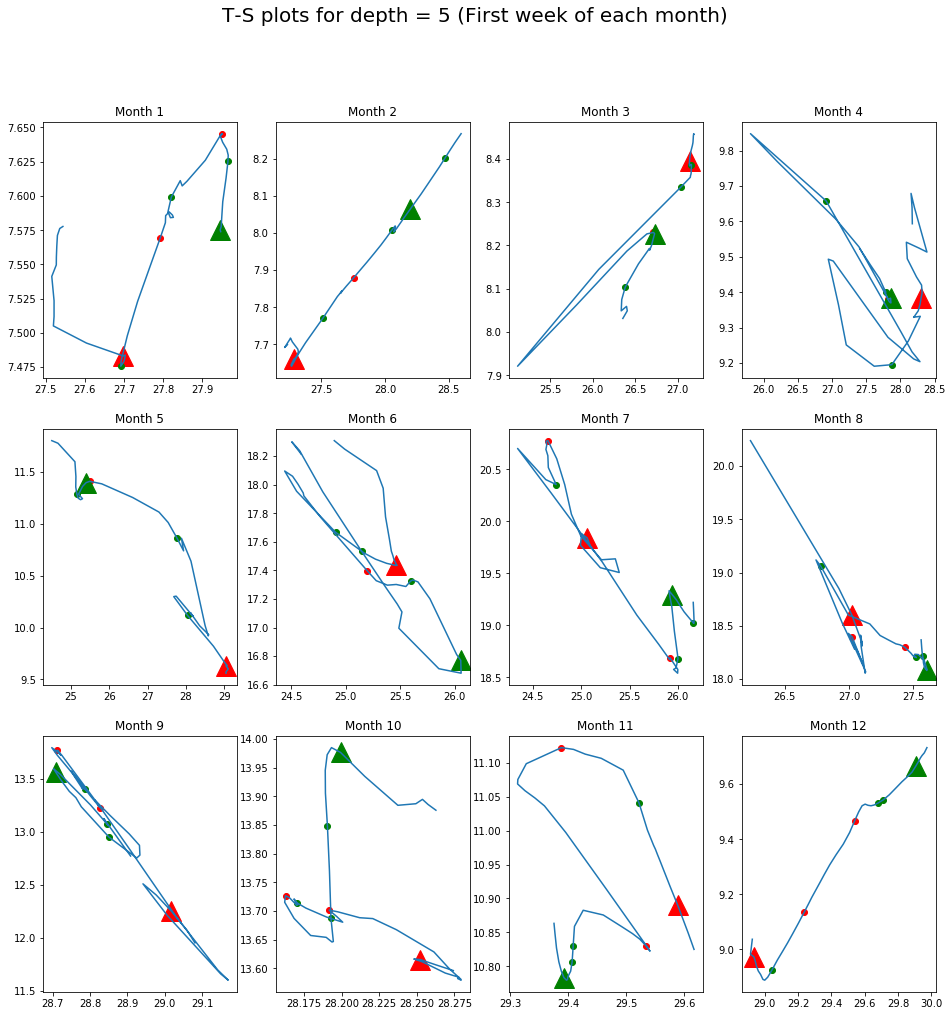

In [98]:
fig,axarr = plt.subplots(3,4, figsize = ((16,16)))
l=0
d=5
for month in [Jan, Feb, Mar, Apr,May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]:
    with nc_tools.scDataset(month) as f:
        s = f.variables['vosaline'][:48,:7,558,155]
        t = f.variables['votemper'][:48,:7,558,155]
        ssh = f.variables['sossheig'][:48,558,155]
        starttimes = np.arange(0,ssh.shape[0]-1,12)
        endtimes = starttimes+12
        k = 0
        lows = []
        highs = []
        for n,m in zip(starttimes,endtimes):
            low = np.argmin(ssh[n:m])
            high = np.argmax(ssh[n:m])
            lows.append(low + 12*k)
            highs.append(high + 12*k)
            k = k+1
        first = True
        for m in highs:
            if first == True:
                axarr[l // 4, l % 4].plot(s[m,d], t[m,d], 'r^',markersize=20)
                first = False
            else: 
                axarr[l // 4, l % 4].plot(s[m,d], t[m,d], 'ro')
        first = True
        for n in lows:
            if first == True:
                axarr[l // 4, l % 4].plot(s[m,d], t[m,d], 'g^', markersize=20)
                first = False
            else:
                axarr[l // 4, l % 4].plot(s[n,d], t[n,d], 'go')
        axarr[l // 4, l % 4].plot(s[:,d], t[:,d]);
        axarr[l // 4, l % 4].set_title("Month " + str(l+1))
        l = l+1
fig.suptitle('T-S plots for depth = 5 (First week of each month)', fontsize = 20)